# Proyek Analisis Data: Bikesharing dataset
- Nama: Muhammad Ferdiansa Hutabarat
- Email: muhammad.ferdiansa.17@gmail.com
- Id Dicoding: mfhutabarat

## Menentukan Pertanyaan Bisnis

<!-- - Bagaimana perbandingan jumlan penggunaan sepeda berdasarkan hari dan bulan?
- Bagaimana pengaruh season terhadap user casual dan registered dalam menggunakan bike? -->
- Bagaimana penggunaan sepeda berdasarkan jam di tiap hari, sehingga ketersediaan sepeda dapat optimal?
- Apakah faktor season dapat berpengaruh secara signifikan terhadap jumlah sewa sepeda (bike-sharing)?


## Menyiapkan semua library yang dibutuhkan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [79]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


### Assessing Data

In [80]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [81]:
hour_df.duplicated().sum()

0

In [82]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [83]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [84]:
# Memperbaiki nama kolom 
hour_df = hour_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'weekday': 'day',
    'weathersit': 'weather',
    'hum': 'humidity',
    'cnt': 'count',
})
hour_df

,instant,date,season,year,month,hour,holiday,day,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [89]:
# Mengganti nama Season

hour_df['season'].replace(1, 'Springer', inplace=True)
hour_df['season'].replace(2, 'Summer', inplace=True)
hour_df['season'].replace(3, 'Fall', inplace=True)
hour_df['season'].replace(4, 'Winter', inplace=True)

# Tahun
hour_df['year'].replace(1, '2012', inplace=True)
hour_df['year'].replace(0, '2011', inplace=True)

# Is weekend
hour_df['workingday'].replace(1, 'Workingday', inplace=True)
hour_df['workingday'].replace(0, 'Weekend', inplace=True)

# Is holiday
hour_df['holiday'].replace(1, 'Holiday', inplace=True)
hour_df['holiday'].replace(0, 'non-Holiday', inplace=True)

# Weather
hour_df['weather'].replace(1, 'Clear', inplace=True)
hour_df['weather'].replace(2, 'Mist', inplace=True)
hour_df['weather'].replace(3, 'Light', inplace=True)
hour_df['weather'].replace(4, 'Heavy', inplace=True)

# Nama hari
hour_df['day'].replace(0, 'Sunday', inplace=True)
hour_df['day'].replace(1, 'Monday', inplace=True)
hour_df['day'].replace(2, 'Tuesday', inplace=True)
hour_df['day'].replace(3, 'Wednesday', inplace=True)
hour_df['day'].replace(4, 'Thursday', inplace=True)
hour_df['day'].replace(5, 'Friday', inplace=True)
hour_df['day'].replace(6, 'Saturday', inplace=True)

hour_df.head()

,instant,date,season,year,month,hour,holiday,day,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Springer,2011,1,0,non-Holiday,Saturday,Weekend,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,2011,1,1,non-Holiday,Saturday,Weekend,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,2011,1,2,non-Holiday,Saturday,Weekend,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,2011,1,3,non-Holiday,Saturday,Weekend,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,2011,1,4,non-Holiday,Saturday,Weekend,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [19]:
# Menghapus kolom instant
# new_hour_df = hour_df.drop(columns = ["instant",])
# new_hour_df

In [91]:
# Mengubah tipe menjadi datetime
hour_df['datetime'] = pd.to_datetime(hour_df['date'])
hour_df.info()
hour_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   date        17379 non-null  object        
 2   season      17379 non-null  object        
 3   year        17379 non-null  object        
 4   month       17379 non-null  int64         
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  object        
 7   day         17379 non-null  object        
 8   workingday  17379 non-null  object        
 9   weather     17379 non-null  object        
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  humidity    17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  count       17379 non-

,instant,date,season,year,month,hour,holiday,day,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime
0,1,2011-01-01,Springer,2011,1,0,non-Holiday,Saturday,Weekend,Clear,0.24,0.2879,0.81,0.0000,3,13,16,2011-01-01
1,2,2011-01-01,Springer,2011,1,1,non-Holiday,Saturday,Weekend,Clear,0.22,0.2727,0.80,0.0000,8,32,40,2011-01-01
2,3,2011-01-01,Springer,2011,1,2,non-Holiday,Saturday,Weekend,Clear,0.22,0.2727,0.80,0.0000,5,27,32,2011-01-01
3,4,2011-01-01,Springer,2011,1,3,non-Holiday,Saturday,Weekend,Clear,0.24,0.2879,0.75,0.0000,3,10,13,2011-01-01
4,5,2011-01-01,Springer,2011,1,4,non-Holiday,Saturday,Weekend,Clear,0.24,0.2879,0.75,0.0000,0,1,1,2011-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Springer,2012,12,19,non-Holiday,Monday,Workingday,Mist,0.26,0.2576,0.60,0.1642,11,108,119,2012-12-31
17375,17376,2012-12-31,Springer,2012,12,20,non-Holiday,Monday,Workingday,Mist,0.26,0.2576,0.60,0.1642,8,81,89,2012-12-31
17376,17377,2012-12-31,Springer,2012,12,21,non-Holiday,Monday,Workingday,Clear,0.26,0.2576,0.60,0.1642,7,83,90,2012-12-31
17377,17378,2012-12-31,Springer,2012,12,22,non-Holiday,Monday,Workingday,Clear,0.26,0.2727,0.56,0.1343,13,48,61,2012-12-31


In [92]:
# membuat kolom baru dayname dan monthname dengan tipe datetime
hour_df['dayname'] = hour_df['datetime'].dt.day_name()
hour_df['monthname'] = hour_df['datetime'].dt.month_name()
hour_df.head(150)

,instant,date,season,year,month,hour,holiday,day,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime,dayname,monthname
0,1,2011-01-01,Springer,2011,1,0,non-Holiday,Saturday,Weekend,Clear,0.24,0.2879,0.81,0.0000,3,13,16,2011-01-01,Saturday,January
1,2,2011-01-01,Springer,2011,1,1,non-Holiday,Saturday,Weekend,Clear,0.22,0.2727,0.80,0.0000,8,32,40,2011-01-01,Saturday,January
2,3,2011-01-01,Springer,2011,1,2,non-Holiday,Saturday,Weekend,Clear,0.22,0.2727,0.80,0.0000,5,27,32,2011-01-01,Saturday,January
3,4,2011-01-01,Springer,2011,1,3,non-Holiday,Saturday,Weekend,Clear,0.24,0.2879,0.75,0.0000,3,10,13,2011-01-01,Saturday,January
4,5,2011-01-01,Springer,2011,1,4,non-Holiday,Saturday,Weekend,Clear,0.24,0.2879,0.75,0.0000,0,1,1,2011-01-01,Saturday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,2011-01-07,Springer,2011,1,8,non-Holiday,Friday,Workingday,Clear,0.20,0.1970,0.51,0.2537,20,190,210,2011-01-07,Friday,January
146,147,2011-01-07,Springer,2011,1,9,non-Holiday,Friday,Workingday,Clear,0.20,0.1818,0.47,0.2985,9,125,134,2011-01-07,Friday,January
147,148,2011-01-07,Springer,2011,1,10,non-Holiday,Friday,Workingday,Clear,0.22,0.1970,0.37,0.3284,16,47,63,2011-01-07,Friday,January
148,149,2011-01-07,Springer,2011,1,11,non-Holiday,Friday,Workingday,Mist,0.20,0.1970,0.40,0.2239,19,48,67,2011-01-07,Friday,January


In [12]:
# # Mengubah tipe kolom menjadi kategori
# type_change = ['year','season', 'month', 'hour', 'holiday', 'day', 'workingday', 'weather']
# for column in type_change:
#   hour_df[column] = hour_df[column].astype('category')
# hour_df.info()

In [13]:
# Mengganti tipe date menjadi datetime
# pd.to_datetime(hour_df['date'])
# hour_df.info()

## Exploratory Data Analysis (EDA)

### Explore Casual and Registered User

In [105]:
# Bike sharing user causal by days
casual_daily_bike_share = hour_df.groupby('dayname')['casual'].sum().sort_values(ascending=False)
casual_daily_bike_share

dayname
Saturday     153852
Sunday       140521
Friday        78238
Monday        70784
Thursday      61460
Tuesday       57843
Wednesday     57319
Name: casual, dtype: int64

In [106]:
# Bike sharing user registered by days
registered_daily_bike_share = hour_df.groupby('dayname')['registered'].sum().sort_values(ascending=False)
registered_daily_bike_share

dayname
Thursday     423935
Wednesday    415729
Tuesday      411266
Friday       409552
Monday       384719
Saturday     323955
Sunday       303506
Name: registered, dtype: int64

In [112]:
user_daily_bike_share = hour_df.groupby('dayname')['count'].sum().sort_values(ascending=False)
user_daily_bike_share

dayname
Friday       487790
Thursday     485395
Saturday     477807
Wednesday    473048
Tuesday      469109
Monday       455503
Sunday       444027
Name: count, dtype: int64

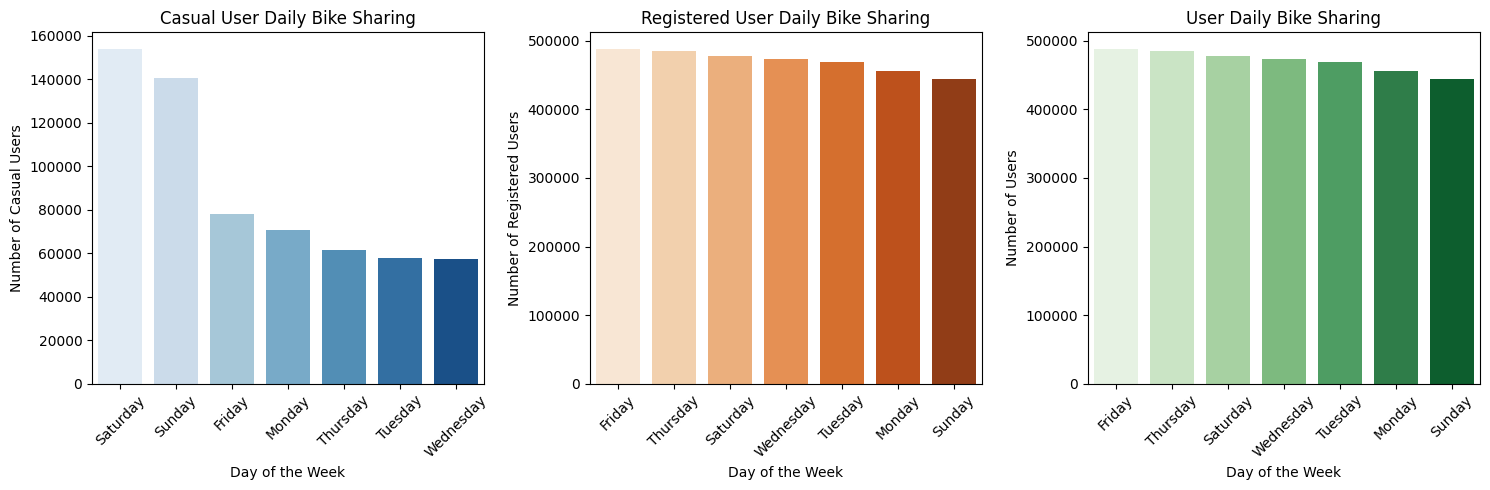

In [121]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Your data
# casual_daily_bike_share = hour_df.groupby('dayname')['casual'].sum().sort_values(ascending=False)
# registered_daily_bike_share = hour_df.groupby('dayname')['registered'].sum().sort_values(ascending=False)

# Convert the data into Pandas Series
casual_daily_bike_share = pd.Series(casual_daily_bike_share)
registered_daily_bike_share = pd.Series(registered_daily_bike_share)
user_daily_bike_share = pd.Series(user_daily_bike_share)


# Set the figure size
plt.figure(figsize=(15, 5))

# Create bar plots for both casual and registered users
plt.subplot(1, 3, 1)
ax1 = sns.barplot(x=casual_daily_bike_share.index,
                  y=casual_daily_bike_share.values, palette='Blues')
ax1.set_title("Casual User Daily Bike Sharing")
ax1.set_xlabel("Day of the Week")
ax1.set_ylabel("Number of Casual Users")
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
ax2 = sns.barplot(x=registered_daily_bike_share.index,
                  y=registered_daily_bike_share.values, palette='Oranges')
ax2.set_title("Registered User Daily Bike Sharing")
ax2.set_xlabel("Day of the Week")
ax2.set_ylabel("Number of Registered Users")
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
ax2 = sns.barplot(x=registered_daily_bike_share.index,
                  y=registered_daily_bike_share.values, palette='Greens')
ax2.set_title("User Daily Bike Sharing")
ax2.set_xlabel("Day of the Week")
ax2.set_ylabel("Number of Users")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [18]:
# Casual user bike sharing by Month
casual_monthly_bike_share = hour_df.groupby('monthname')['casual'].sum()
casual_monthly_bike_share

monthname
April        60802
August       72039
December     21693
February     14963
January      12042
July         78157
June         73906
March        44444
May          75285
November     36603
October      59760
September    70323
Name: casual, dtype: int64

In [19]:
# Registered user bike sharing by Month
registered_monthly_bike_share = hour_df.groupby('monthname')['registered'].sum()
registered_monthly_bike_share

monthname
April        208292
August       279155
December     189343
February     136389
January      122891
July         266791
June         272436
March        184476
May          256401
November     218228
October      262592
September    275668
Name: registered, dtype: int64

In [142]:
# Casual user using bike-sharing by season
casual_seasonally_bike_share = (hour_df.groupby('season')['casual'].sum().sort_values(ascending=False))
casual_seasonally_bike_share

season
Fall        226091
Summer      203522
Winter      129782
Springer     60622
Name: casual, dtype: int64

In [143]:
# Registered user using bike-sharing by season
registered_seasonally_bike_share = (hour_df.groupby('season')['registered'].sum().sort_values(ascending=False))
registered_seasonally_bike_share

season
Fall        835038
Summer      715067
Winter      711831
Springer    410726
Name: registered, dtype: int64

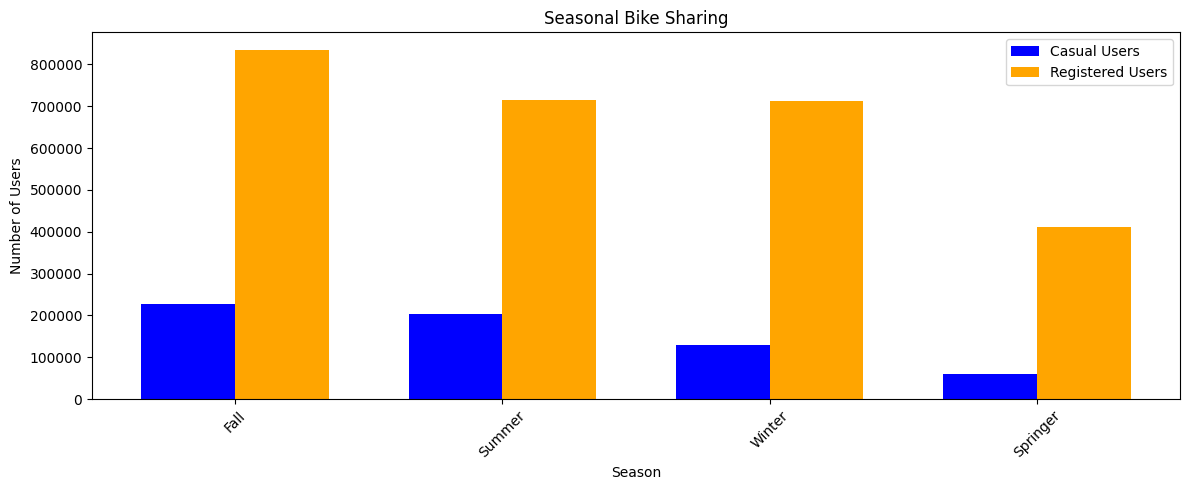

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame for easier plotting
seasonal_bike_share_df = pd.DataFrame({
    'Season': casual_seasonally_bike_share.index,  # Use the index for season names
    'Casual Users': casual_seasonally_bike_share.values,
    'Registered Users': registered_seasonally_bike_share.values
})

# Set the figure size
plt.figure(figsize=(12, 5))

# Create bar plots for both casual and registered users with adjacent bars
bar_width = 0.35
index = range(len(seasonal_bike_share_df))

plt.bar(index, seasonal_bike_share_df['Casual Users'], bar_width, color='blue', label='Casual Users')
plt.bar([i + bar_width for i in index], seasonal_bike_share_df['Registered Users'], bar_width, color='orange', label='Registered Users')

plt.xlabel('Season')
plt.ylabel('Number of Users')
plt.title('Seasonal Bike Sharing')
plt.xticks([i + bar_width / 2 for i in index], seasonal_bike_share_df['Season'])
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Visualization & Explanatory Analysis

### Pertanyaan 1: 
Bagaimana perbandingan jumlah penggunaan sepeda berdasarkan hari dan bulan?

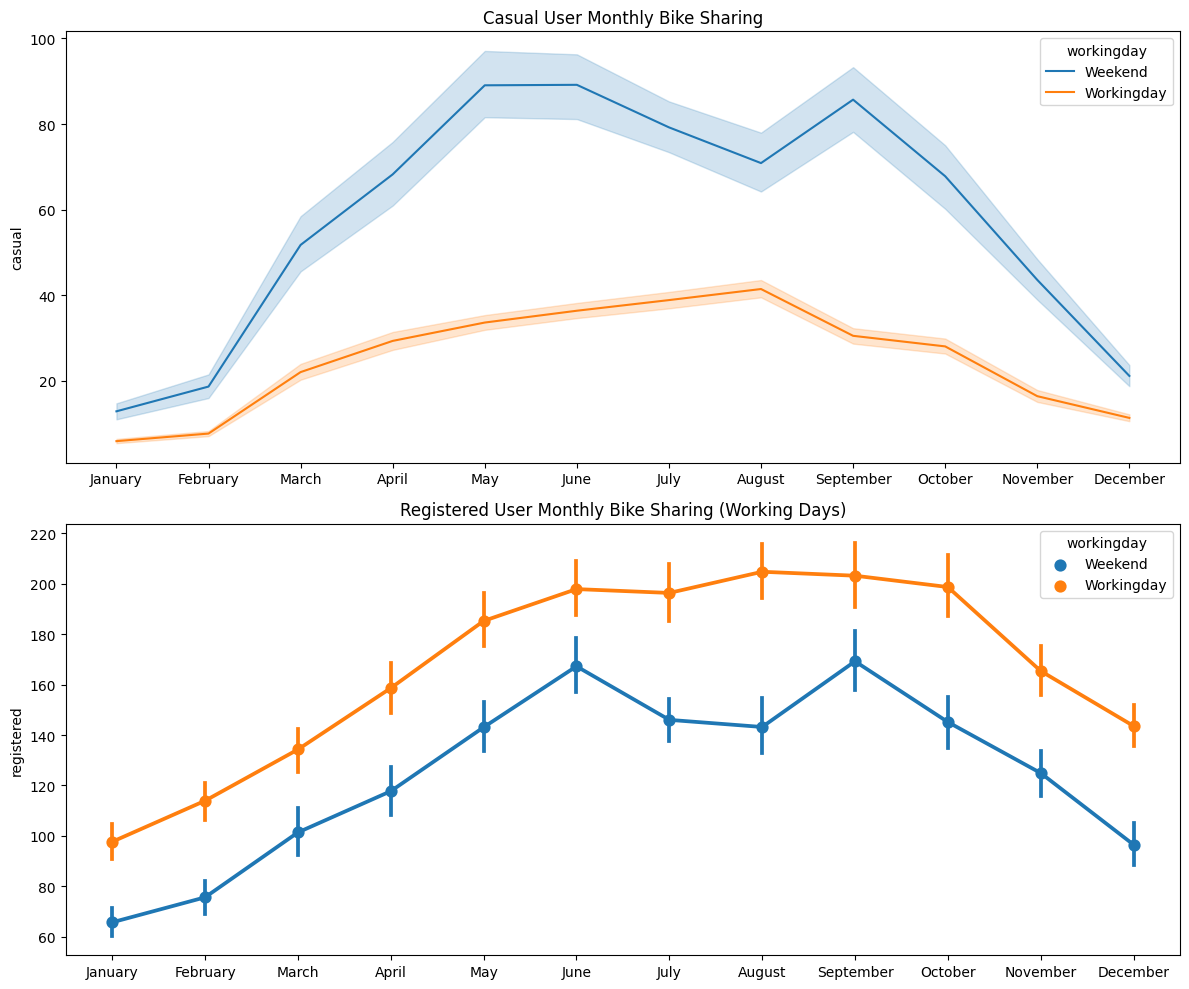

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Line plot for casual users by month
sns.lineplot(data=hour_df, x="monthname", y="casual", ax=ax[0], hue="workingday")
ax[0].set_title("Casual User Monthly Bike Sharing")
ax[0].set_xlabel("")

# Point plot for registered users on working days by month
sns.pointplot(data=hour_df, x="monthname", y="registered", ax=ax[1], hue="workingday")
ax[1].set_title("Registered User Monthly Bike Sharing (Working Days)")
ax[1].set_xlabel("")

plt.tight_layout()
plt.show()


### Pertanyaan 2:
Apakah faktor season dapat berpengaruh secara signifikan terhadap jumlah sewa sepeda (bike-sharing)?

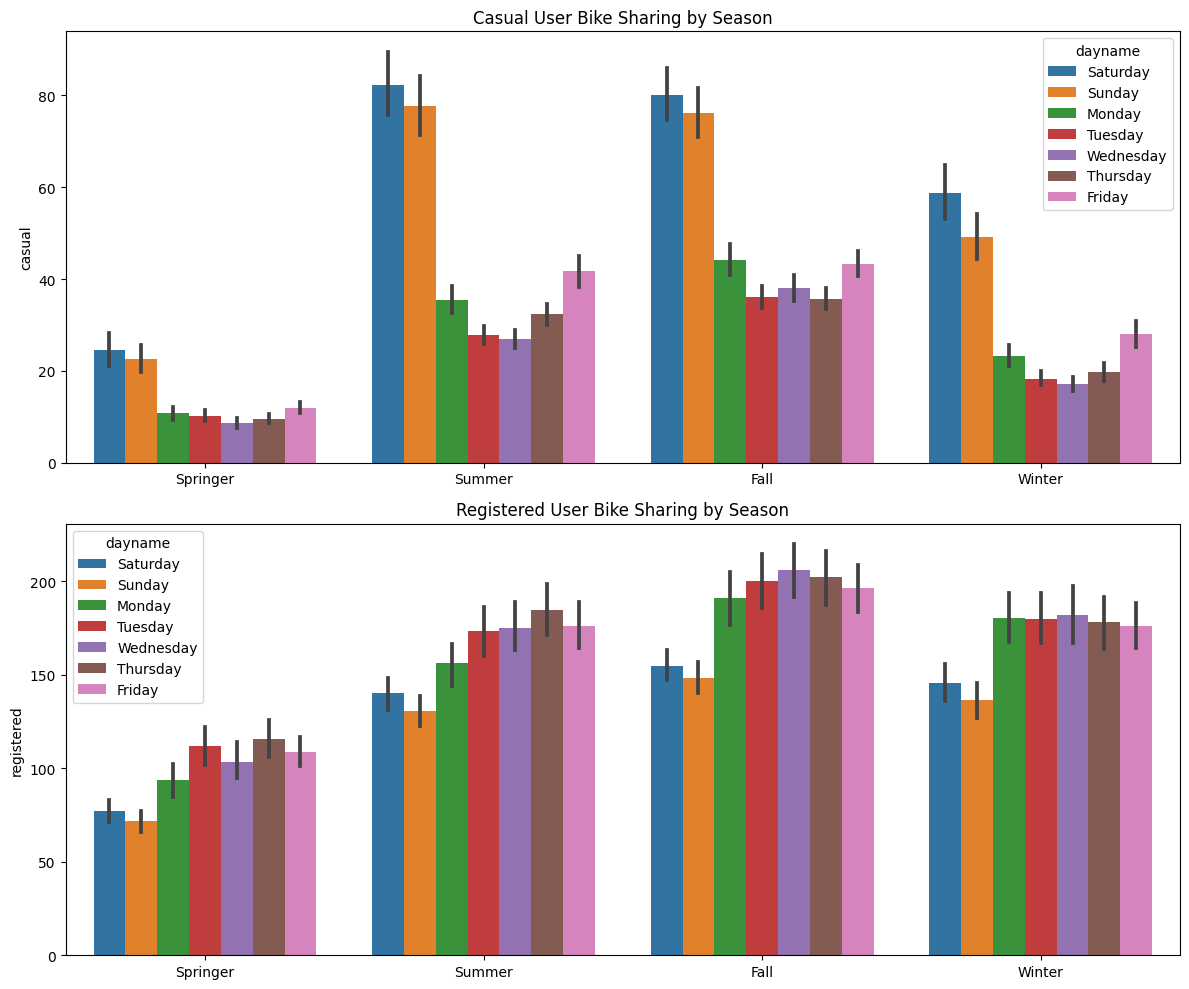

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Bar plot for casual users by season
sns.barplot(data=hour_df, x='season', y='casual', ax=ax[0], hue='dayname')
ax[0].set_title("Casual User Bike Sharing by Season")
ax[0].set_xlabel("")

# Bar plot for registered users by season
sns.barplot(data=hour_df, x='season', y='registered', ax=ax[1], hue='dayname')
ax[1].set_title("Registered User Bike Sharing by Season")
ax[1].set_xlabel("")

plt.tight_layout()
plt.show()


## Conclusion

- Conclution pertanyaan 1: user casual banyak menggunakan sepada di hari weekend yaitu saturday dan sunday, sedangkan user registered banyak menggunakan sepeda di hari weekday/workingday. user registered terbanyak menggunakan sepeda di hari thursday dan user casual terbanyak menggunakan sepeda di hari saturday  
- conclution pertanyaan 2: user casual dan registered lebih banyak menggunakan sepeda di season fall, posisi kedua season summer, ketiga season winter dan paling sedikit di season springer. 